<a href="https://colab.research.google.com/github/KayvanShah1/usc-dsci-552-lab-assignments-hw/blob/main/assignment-2/Kayvan_Shah_Assignment%202_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Exploratory Data Analysis and K Nearest Neighbors Classification

For this assignment you will perform exploratory data analysis to visualize Fisher’s Iris dataset using Scikit Learn. And, you will explore the bias/variance trade-off by applying k-nearest neighbors classification to the Iris dataset and varying the hyperparameter k.

Documentation for Scikit Learn:
+ The top level documenation page is here: https://scikit-learn.org/stable/index.html
+ The API for the KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
+ The User Guide for KNearestNeighborsClassifier is here: https://scikit-learn.org/stable/modules/neighbors.html#classification
+ Scikit Learn provides many Jupyter notebook examples on how use the toolkit. These Jupyter notebook examples can be run on MyBinder: https://scikit-learn.org/stable/auto_examples/index.html

For more information about the Iris dataset, see this page https://en.wikipedia.org/wiki/Iris_flower_data_set.

In [3]:
%%bash
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from pandas import DataFrame

Load Iris dataset

In [5]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

In [6]:
print("Number of instances in the iris dataset:", X.shape[0])
print("Number of features in the iris dataset:", X.shape[1])
print("The dimension of the data matrix X is", X.shape)

Number of instances in the iris dataset: 150
Number of features in the iris dataset: 4
The dimension of the data matrix X is (150, 4)


In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

The `y` vector length is 150. It has three unique values: 0, 1 and 2. Each value represents a species of iris flower.

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
y.shape

(150,)

In [10]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Extension: Show the summary table of iris data including min, max, median, quantiles

In [13]:
# Insert your answer here
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [14]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Part 1Exploratory Data Analysis
### Part 1a
Generate [scatter plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) using each pair of the attributes as axis. You should generate $6 = {4 \choose 2}$ scatter plots.

In [15]:
## Insert your answer here...
iris_df_pp = iris_df.copy(deep=True)
iris_df_pp["flower"] = y
iris_df_pp["flower"] = iris_df_pp["flower"].map({0:"setosa",1:"versicolor",2:"virginica"})
iris_df_pp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


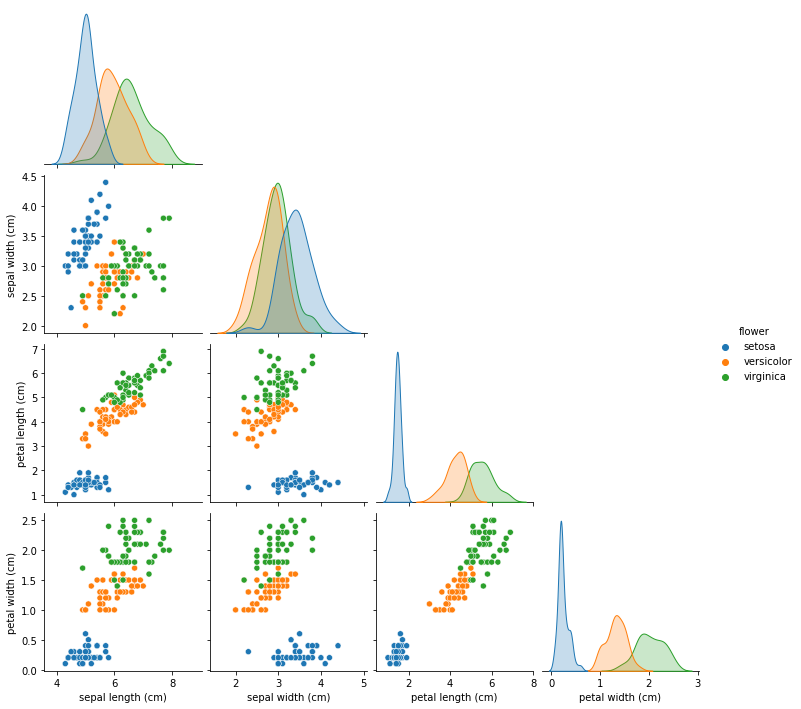

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris_df_pp, hue="flower", corner=True)

### Extension: Draw a boxplot of sepal length (cm), sepal width (cm), petal length (cm), petal width (cm). Use color to show the different target class.

Some links to help you: 

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

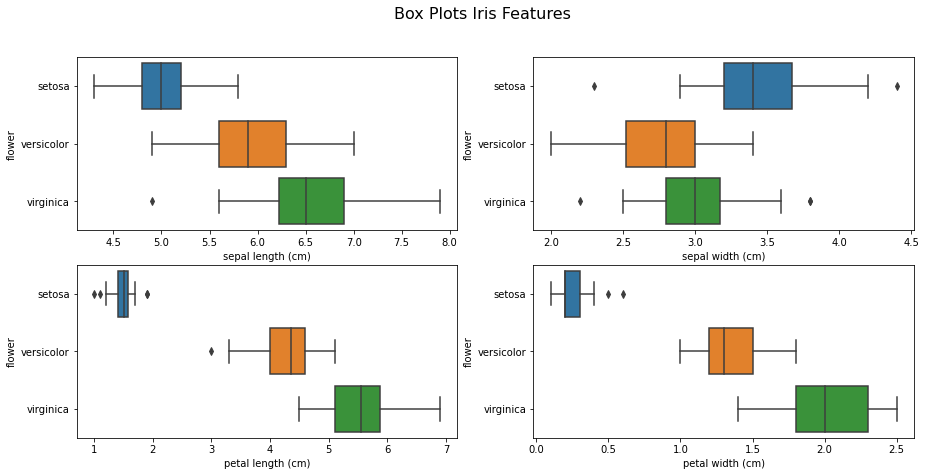

In [17]:
# Insert your code ...
# Creating subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
fig.suptitle("Box Plots Iris Features", fontsize=16)

axes = [ax[0,0], ax[0,1], 
        ax[1,0], ax[1,1]]

for i, feat in enumerate(iris.feature_names):
    sns.boxplot(data=iris_df_pp, x=feat, y="flower", ax=axes[i])

### Part 1b
If you were to draw linear decision boundaries to separate the classes, which scatter plot do you think will have the least error and which the most?

### Insert your 1b answer here
Scatter Plot with:

- Most Error: `sepal width (cm) vs sepal length (cm)`

- Least Error: `sepal width (cm) vs petal length (cm)` 

### Part 1c
Scatter plots using two attributes of the data are equivalent to project the four dimensional data down to two dimensions using axis-parallel projection. Principal component analysis (PCA) is a technique to linearly project the data to lower dimensions that are not necessarily axis-parallel. Use PCA to project the data down to two dimensions.

Documentation for PCA:
+ API https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
+ User guide https://scikit-learn.org/stable/modules/decomposition.html#pca

In [18]:
### Insert your code here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dimension_reducer = pca.fit(iris_df)
data = pd.DataFrame(dimension_reducer.transform(iris_df), columns=[f"comp_{i}" for i in range(2)])
data["flower"] = iris_df_pp["flower"].copy(deep=True)
data.head()

,comp_0,comp_1,flower
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


### In the case of the Iris dataset, does PCA do a better job of separating the classes?

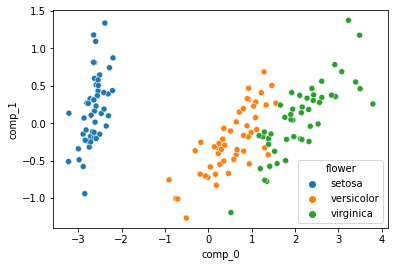

In [19]:
sns.scatterplot(data=data, x="comp_0", y="comp_1", hue="flower")

### Insert your answer

PCA with `n_components=2` does a better job separating the `3` classes with minimal region of overlap between ___versicolor___ & ___virginica___

## Part 2 K Nearest Neighbor

Split the dataset into train set and test set. Use 67 percent of the dataset for training, and use 33 percent for testing.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, 
)

In [21]:
print("Number of instances in the train set:", X_train.shape[0])
print("Number of instances in the test set:", X_test.shape[0])

Number of instances in the train set: 100
Number of instances in the test set: 50


### Part 2a Create a KNeibhorsClassifier with `n_neighbors = 5`. And, train the classifier using the train set.

In [22]:
### Insert you answer here
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
print("Using", model.n_neighbors, "neighbors:")
print("The train accuracy score is:", model.score(X_train, y_train))
print("The test accuracy score is :", model.score(X_test, y_test))

Using 5 neighbors:
The train accuracy score is: 0.96
The test accuracy score is : 0.98


### Part 2b Tuning hyperparameter k
As we have seen in class, hyperparameter k of the K Nearest Neighbors classification affects the inductive bias. For this part train multiple near neighbor classifier models, store the results in a DataFrame. The plot plot training error and testing error versus N/k, where N = 100.

### Extension: Use different metric for knn classification. 
    - 1). Euclidean distance 
    - 2). Manhattan distance 
    - 3). Chebyshev distance.
    

Distance Metrics Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics
 

In [24]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]

def get_train_test_error(k_list: list=k_list, metric=None):
    train = []
    test = []
    n_k = []

    for k in k_list:
        if metric:
            model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        else:
            model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        train.append(1 - model.score(X_train, y_train))
        test.append(1 - model.score(X_test, y_test))
        n_k.append(100/k)
    
    result = pd.DataFrame(
        data = {
            "N/k": n_k, 
            "train error": train, 
            "test error":test
        },
    )
    return result

In [25]:
### Insert your code
# Use the `result` to store the DataFrame
# euclidean
result = get_train_test_error(metric="euclidean")

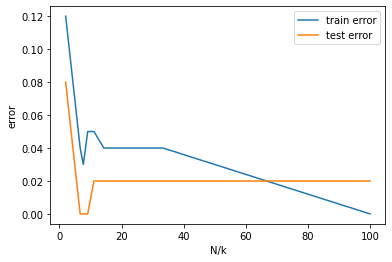

In [26]:
result.plot(x='N/k', y=['train error', 'test error'], ylabel='error')

In [27]:
### Insert your code
# Use the `result` to store the DataFrame
# manhattan
result = get_train_test_error(metric="manhattan")

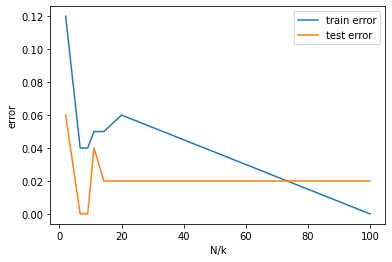

In [28]:
result.plot(x='N/k', y=['train error', 'test error'], ylabel='error')

In [29]:
### Insert your code
# Use the `result` to store the DataFrame
# chebyshev
result = get_train_test_error(metric="chebyshev")

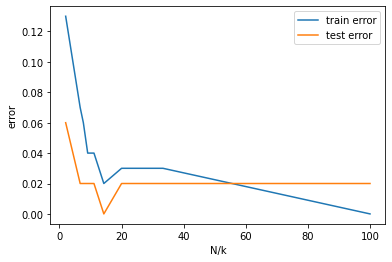

In [30]:
result.plot(x='N/k', y=['train error', 'test error'], ylabel='error')

### Part 2c Plot decision boundaries of K Nearest Neighbors
Use Scikit Learn's [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay) class to visualize the nearest neighbor boundaries as k is varied.

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay

In [31]:
k_list = [1, 3, 5, 7, 9, 11, 13, 15, 50]

Simplify the problem by using only the first 2 attributes of the dataset

In [32]:
X2 = iris.data[:, :2]

In [33]:
### Insert your code here
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

feat_1, feat_2 = np.meshgrid(
    np.linspace(X2[:, 0].min(), X2[:, 0].max()),
    np.linspace(X2[:, 1].min(), X2[:, 1].max())
)
grid = np.vstack([feat_1.ravel(), feat_2.ravel()]).T

In [34]:
ax_ = [[0,0], [0,1], [0,2],
       [1,0], [1,1], [1,2],
       [2,0], [2,1], [2,2]]

def get_pred():
    y = []
    for k in k_list:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X2, iris.target)
        y_pred = np.reshape(model.predict(grid), feat_1.shape)
        y.append(y_pred)
    return y

y = get_pred()

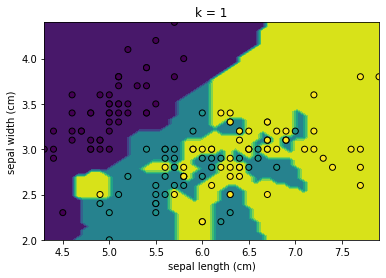

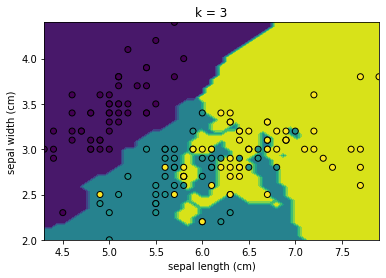

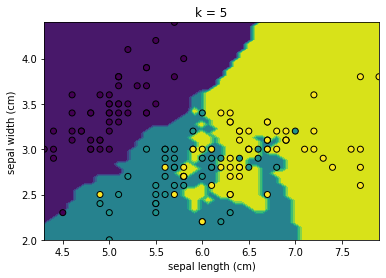

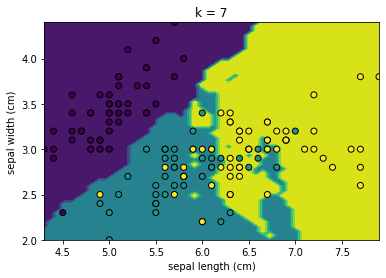

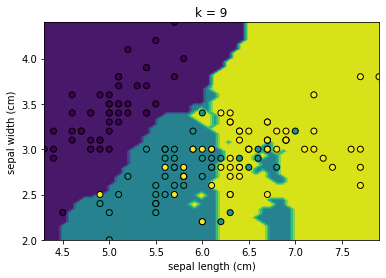

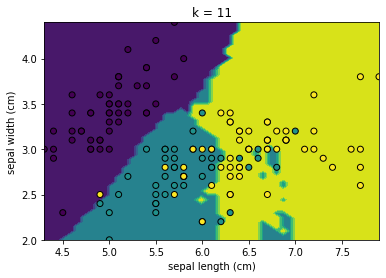

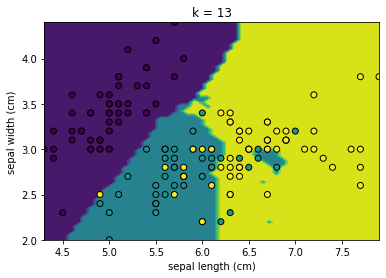

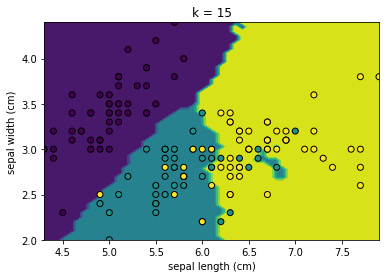

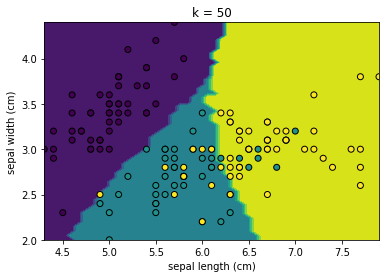

In [35]:
for i in range(len(k_list)):
    display = DecisionBoundaryDisplay(
        xx0=feat_1, xx1=feat_2, response=y[i],
        xlabel=iris.feature_names[0], 
        ylabel=iris.feature_names[1],
    )
    display.plot()
    display.ax_.scatter(
        iris.data[:, 0], iris.data[:, 1], c=iris.target, edgecolor="black"
    )
    plt.title(f"k = {k_list[i]}")